In [976]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [977]:
data=pd.read_csv(r"C:\Users\suraj\Downloads\BostonHousing.csv")

In [978]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [979]:
# crim: Per capita crime rate by town.
# zn: Proportion of large residential lots (over 25,000 sq. ft.).
# indus: Proportion of non-retail business acres per town.
# Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
# nox: Concentration of nitrogen oxides in the air.
# rm: Average number of rooms per dwelling.
# age: Proportion of old owner-occupied units built before 1940.
# dis: Weighted distances to Boston employment centers.
# rad: Index of accessibility to radial highways.
# tax: Property tax rate per $10,000.
# ptratio represents the average number of students per teacher in schools of each town
# lstat:Percentage of lower status of the population.

In [980]:
data=data.rename(columns={"medv":"price"})

In [981]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [982]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [983]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [984]:
# I only uses those cols which have high corr with the price
df = data[["crim", "indus", "rm", "age", "tax", "ptratio", "lstat", "price"]]

In [985]:
df.head(5)

,crim,indus,rm,age,tax,ptratio,lstat,price
0,0.00632,2.31,6.575,65.2,296,15.3,4.98,24.0
1,0.02731,7.07,6.421,78.9,242,17.8,9.14,21.6
2,0.02729,7.07,7.185,61.1,242,17.8,4.03,34.7
3,0.03237,2.18,6.998,45.8,222,18.7,2.94,33.4
4,0.06905,2.18,7.147,54.2,222,18.7,5.33,36.2


In [986]:
df.describe()

,crim,indus,rm,age,tax,ptratio,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,6.284634,68.574901,408.237154,18.455534,12.653063,22.532806
std,8.601545,6.860353,0.702617,28.148861,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.460000,3.561000,2.900000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,5.190000,5.885500,45.025000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,9.690000,6.208500,77.500000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,18.100000,6.623500,94.075000,666.000000,20.200000,16.955000,25.000000
max,88.976200,27.740000,8.780000,100.000000,711.000000,22.000000,37.970000,50.000000


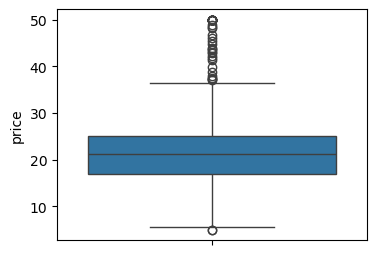

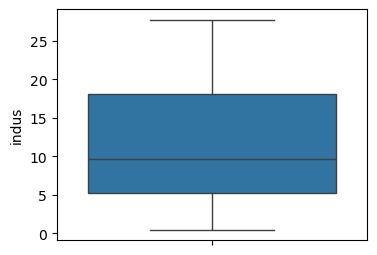

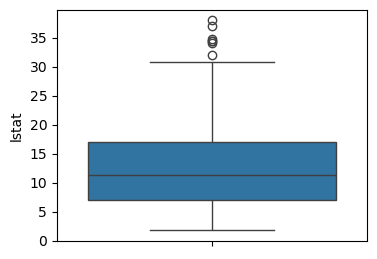

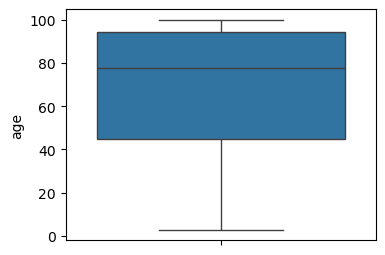

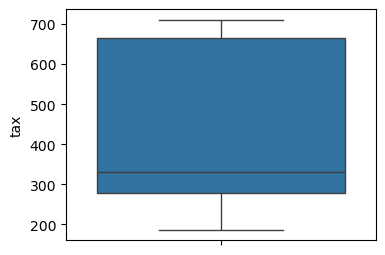

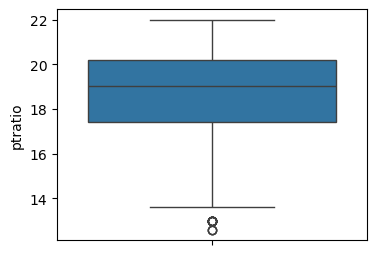

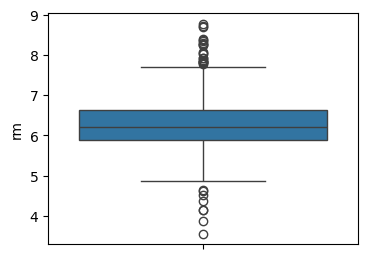

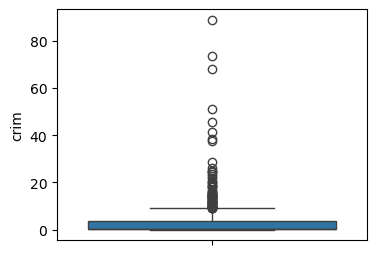

In [987]:
cols={"crim",'indus','rm','age','tax','ptratio','lstat','price'}
for col in cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[col])
    plt.show()

C:\Users\suraj\AppData\Local\Temp\ipykernel_23968\207858705.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['crim'])


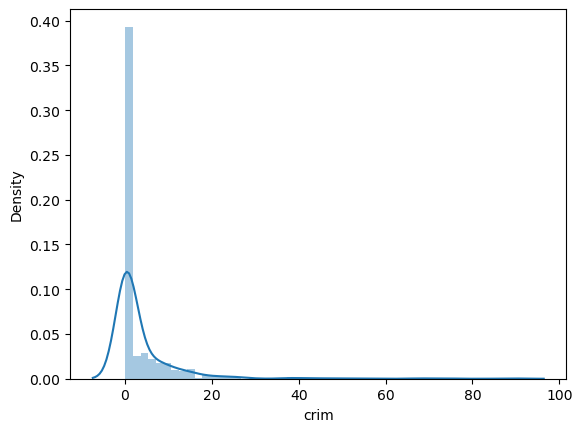

In [988]:
# As we are seeing their are outliers in the dataset to we have handle that first
sns.distplot(df['crim'])
plt.show()

In [989]:
df.shape

(506, 8)

In [990]:
df.loc[df['crim']>=3.677083,'crim'].count()

127

In [991]:
# Q1 25percent
cq1 = df['crim'].quantile(0.25)

# Q2 (median)
cq2 = df['crim'].quantile(0.5)

# Q3 75percent
cq3 = df['crim'].quantile(0.75)


In [992]:
iqr=cq3-cq1
upper=cq3+(1.5*iqr)
lower=cq1-(1.5*iqr)

In [993]:
iqr,upper,lower

(3.5950375, 9.06963875, -5.31051125)

In [994]:
df.loc[df['crim']>upper,'crim'].count(),df.loc[df['crim']<lower,'crim'].count()

(66, 0)

In [995]:
df[df['crim']>=upper]

,crim,indus,rm,age,tax,ptratio,lstat,price
367,13.5222,18.1,3.863,100.0,666,20.2,13.33,23.1
371,9.2323,18.1,6.216,100.0,666,20.2,9.53,50.0
373,11.1081,18.1,4.906,100.0,666,20.2,34.77,13.8
374,18.4982,18.1,4.138,100.0,666,20.2,37.97,13.8
375,19.6091,18.1,7.313,97.9,666,20.2,13.44,15.0
...,...,...,...,...,...,...,...,...
468,15.5757,18.1,5.926,71.0,666,20.2,18.13,19.1
469,13.0751,18.1,5.713,56.7,666,20.2,14.76,20.1
477,15.0234,18.1,5.304,97.3,666,20.2,24.91,12.0
478,10.2330,18.1,6.185,96.7,666,20.2,18.03,14.6


C:\Users\suraj\AppData\Local\Temp\ipykernel_23968\728412793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['crim'].clip(lower, upper))


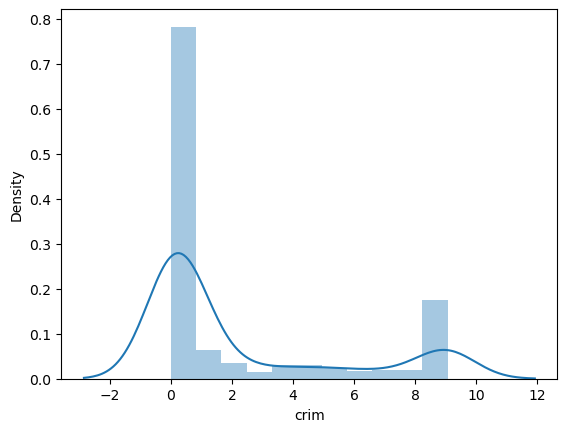

In [996]:
sns.distplot(df['crim'].clip(lower, upper))
plt.show()

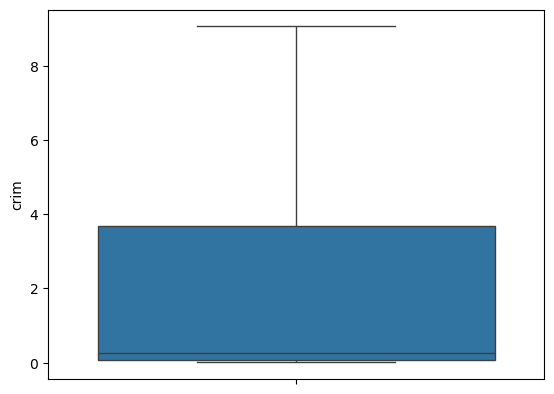

In [997]:
sns.boxplot(data=df['crim'].clip(lower, upper))
plt.show() 

In [998]:
df['crim']=df['crim'].clip(lower, upper)

C:\Users\suraj\AppData\Local\Temp\ipykernel_23968\271213981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crim']=df['crim'].clip(lower, upper)


In [999]:
df.loc[df['crim']>upper,'crim'].count(),df.loc[df['crim']<lower,'crim'].count()

(0, 0)

# we have finally handle outliers without removing them

In [1001]:
# now for rm
# Q1 25percent
rq1 = df['rm'].quantile(0.25)

# Q2 (median)
rq2 = df['rm'].quantile(0.5)

# Q3 75percent
rq3 = df['rm'].quantile(0.75)



In [1002]:
iqr1=rq3-rq1
upper1=rq3+(1.5*iqr1)
lower1=rq1-(1.5*iqr1)

In [1003]:
rq1,rq2,rq3

(5.8854999999999995, 6.2085, 6.6235)

In [1004]:
df.loc[df['rm']>upper1,'rm'].count(),df.loc[df['rm']<lower1,'rm'].count()

(22, 8)

In [1005]:
df['rm']=df['rm'].clip(lower1, upper1)

C:\Users\suraj\AppData\Local\Temp\ipykernel_23968\2076237680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rm']=df['rm'].clip(lower1, upper1)


<Axes: ylabel='rm'>

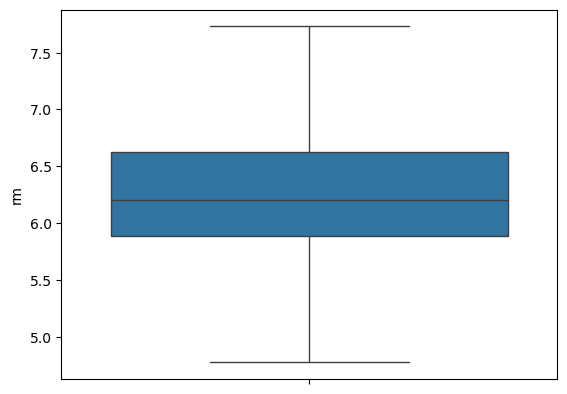

In [1006]:
sns.boxplot(df['rm'])

In [1007]:
# Q1 25percent
lq1 = df['lstat'].quantile(0.25)

# Q2 (median)
lq2 = df['lstat'].quantile(0.5)

# Q3 75percent
lq3 = df['lstat'].quantile(0.75)


In [1008]:
iqr2=lq3-lq1
upper2=lq3+(1.5*iqr2)
lower2=lq1-(1.5*iqr2)


In [1009]:
# df.loc[df['lstat']>upper2,'lstat'].count()
df[df['lstat']>upper2] #as number of outliers are very less we can remove them 

,crim,indus,rm,age,tax,ptratio,lstat,price
141,1.628640,21.89,5.0190,100.0,437,21.2,34.41,14.4
373,9.069639,18.10,4.9060,100.0,666,20.2,34.77,13.8
374,9.069639,18.10,4.7785,100.0,666,20.2,37.97,13.8
387,9.069639,18.10,5.0000,89.5,666,20.2,31.99,7.4
412,9.069639,18.10,4.7785,100.0,666,20.2,34.37,17.9
414,9.069639,18.10,4.7785,100.0,666,20.2,36.98,7.0
438,9.069639,18.10,5.9350,87.9,666,20.2,34.02,8.4


In [1010]:
 df=df[df['lstat'] <= upper2]

<Axes: ylabel='lstat'>

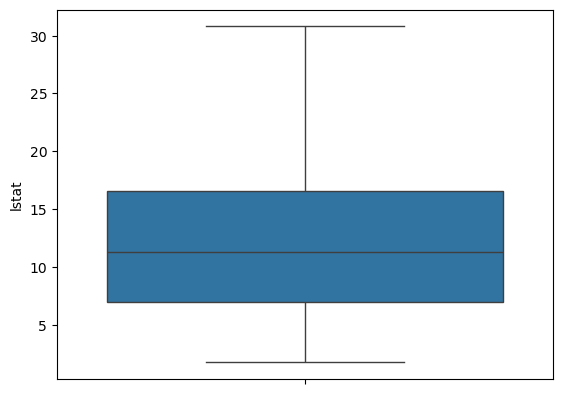

In [1011]:
sns.boxplot(df['lstat'])

In [1012]:
# Q1 25percent
pq1 = df['ptratio'].quantile(0.25)

# Q2 (median)
pq2 = df['ptratio'].quantile(0.5)

# Q3 75percentascii
pq3 = df['ptratio'].quantile(0.75)


In [1013]:
iqr3=pq3-pq1
upper3=pq3+(1.5*iqr3)
lower3=pq1-(1.5*iqr3)


In [1014]:
df[df['ptratio']<lower3]

,crim,indus,rm,age,tax,ptratio,lstat,price


# Now all outliers has been handled


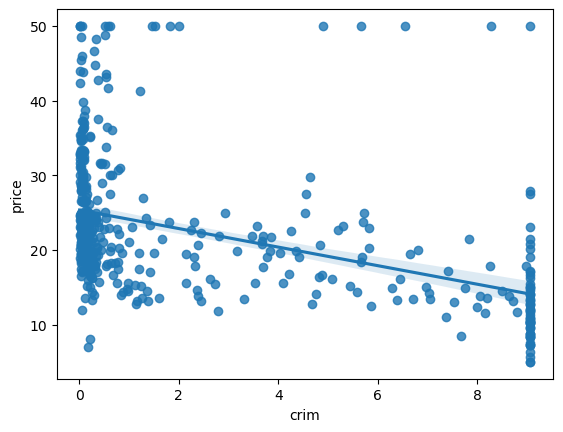

In [1016]:
sns.regplot(x="crim",y="price",data=df)
plt.show()

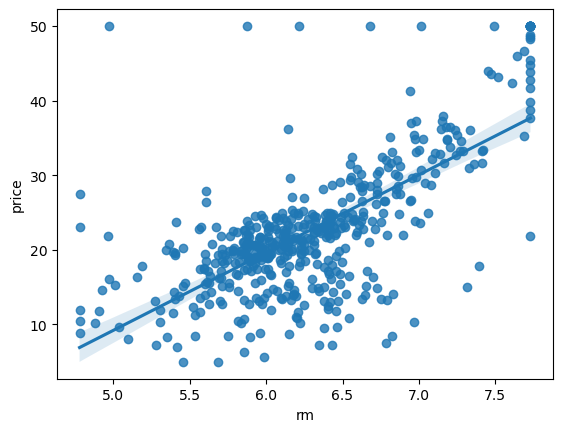

In [1017]:
sns.regplot(x="rm",y="price",data=df)
plt.show()

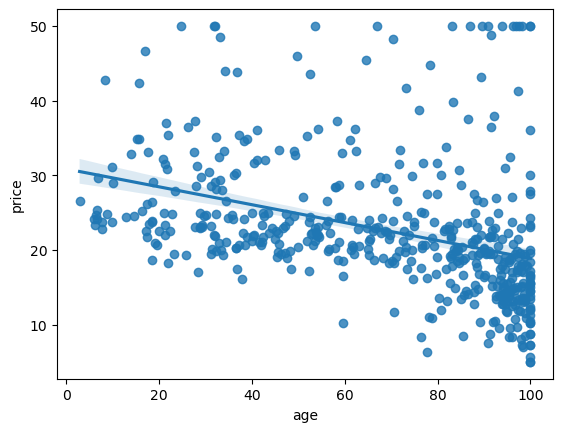

In [1018]:
sns.regplot(x="age",y="price",data=df)
plt.show()

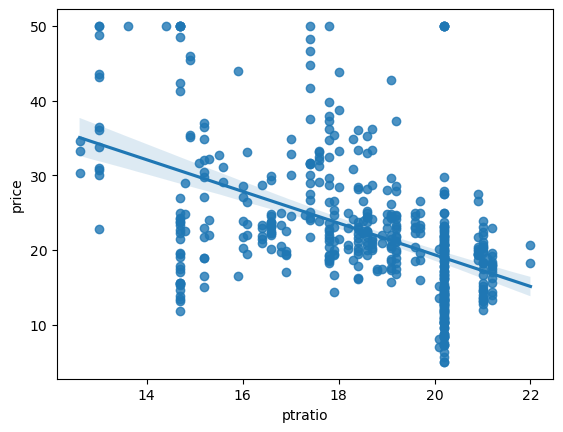

In [1019]:
sns.regplot(x="ptratio",y="price",data=df)
plt.show()

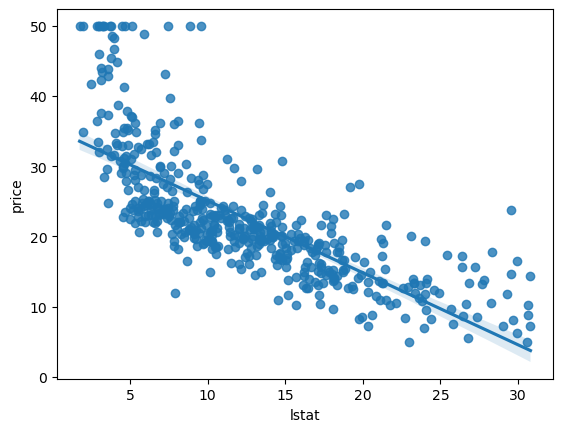

In [1020]:
sns.regplot(x="lstat",y="price",data=df)
plt.show()

In [1021]:
x=df.iloc[:,:-1]
y=df["price"]

In [1022]:
x.head()

,crim,indus,rm,age,tax,ptratio,lstat
0,0.00632,2.31,6.575,65.2,296,15.3,4.98
1,0.02731,7.07,6.421,78.9,242,17.8,9.14
2,0.02729,7.07,7.185,61.1,242,17.8,4.03
3,0.03237,2.18,6.998,45.8,222,18.7,2.94
4,0.06905,2.18,7.147,54.2,222,18.7,5.33


In [1023]:
from sklearn.model_selection import train_test_split

In [1024]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [1025]:
x_train.shape

(399, 7)

In [1026]:
x_train

,crim,indus,rm,age,tax,ptratio,lstat
56,0.02055,0.74,6.383,35.7,313,17.3,5.77
228,0.29819,6.20,7.686,17.0,307,17.4,3.92
281,0.03705,3.33,6.968,37.2,216,14.9,4.59
493,0.17331,9.69,5.707,54.0,391,19.2,12.01
221,0.40771,6.20,6.164,91.3,307,17.4,21.46
...,...,...,...,...,...,...,...
106,0.17120,8.56,5.836,91.9,384,20.9,18.66
271,0.16211,6.96,6.240,16.3,223,18.6,6.59
349,0.02899,1.25,6.939,34.5,335,19.7,5.89
442,5.66637,18.10,6.219,100.0,666,20.2,16.59


In [1027]:
from sklearn.preprocessing import StandardScaler

In [1028]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
scaler_X.fit(x_train)
x_train_scaled = scaler_X.transform(x_train)

# Scale target (only if it's a regression problem)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [1029]:
x_train_scaled

array([[-0.67497808, -1.50231308,  0.12382967, ..., -0.56045151,
        -0.48639681, -0.97213986],
       [-0.59023262, -0.70547401,  2.18800955, ..., -0.59620214,
        -0.44075421, -1.24424716],
       [-0.6699417 , -1.12432532,  1.05057198, ..., -1.13841994,
        -1.58181916, -1.14570019],
       ...,
       [-0.6724019 , -1.42788306,  1.00463091, ..., -0.42936589,
         0.60902554, -0.95448966],
       [ 1.04832404,  1.03122652, -0.13597501, ...,  1.54287687,
         0.83723853,  0.61932012],
       [-0.61142509, -0.36105273,  0.15868152, ..., -0.13740246,
         1.15673672, -0.25730664]])

In [1030]:
x_test_scaled=scaler_X.transform(x_test)
y_test_scaled=scaler_y.transform(y_test.values.reshape(-1, 1))

In [1031]:
# x_test_scaled

In [1032]:
# y_test_scaled

In [1033]:
from sklearn.linear_model import LinearRegression

In [1034]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [1035]:
r2_score = lr.score(x_test_scaled, y_test_scaled) * 100

In [1036]:
r2_score

68.88881940454513

In [1037]:
#checking overfitting
lr.score(x_test_scaled,y_test_scaled),lr.score(x_train_scaled,y_train_scaled)

(0.6888881940454513, 0.7000322932475479)

In [1038]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=23)  
ridge.fit(x_train_scaled, y_train_scaled)

Ridge(alpha=23)

In [1039]:
ridge.score(x_test_scaled,y_test_scaled)

0.6853940362090281

In [1040]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [i for i in range(0,100)]}
gd = GridSearchCV(Ridge(), param_grid, cv=5)
gd.fit(x_train_scaled,y_train_scaled)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, ...]})

In [1041]:
gd.best_params_# lets see how much it can improve

{'alpha': 23}

In [1042]:
ridge.score(x_test_scaled,y_test_scaled),ridge.score(x_train_scaled,y_train_scaled)

(0.6853940362090281, 0.6986082380365186)

In [1151]:
from sklearn.metrics import r2_score

# Predict
y_pred_scaled = ridge.predict(x_test_scaled)

# Inverse transform to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# Get actual R²
print("R²:", r2_score(y_true, y_pred))


R²: 0.6853940362090281


In [1170]:
score=r2_score(y_true, y_pred)

In [1172]:
score

0.6853940362090281

# residual -> error between real output and predicted output


In [1190]:
residual=y_true-y_pred


In [1192]:
# y_true,y_pred

In [1161]:
# residual

C:\Users\suraj\AppData\Local\Temp\ipykernel_23968\3053085854.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


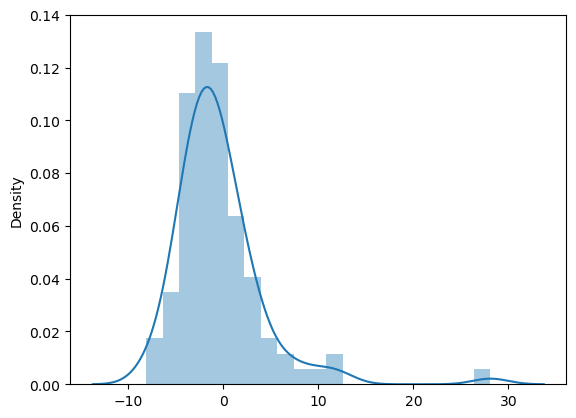

In [1194]:
sns.distplot(residual,kde=True)
plt.show()

In [1165]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [1167]:
print(mean_squared_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred))
print(np.sqrt(mean_squared_error(y_true, y_pred)))

22.04758594247132
3.1760805589979917
4.69548569825011


# adjusted r2score must be less than r2 score for better model

In [1174]:
adj_score=1-(1-score)*(len(y_test_scaled)-1)/(len(y_test_scaled)-x_test_scaled.shape[1]-1)

In [1196]:
score,adj_score

(0.6853940362090281, 0.6614566259205845)

# Pickling the model for deployment

In [1198]:
import pickle

In [1200]:
pickle.dump(ridge,open('regmodel.pkl','wb'))

In [1202]:
model=pickle.load(open('regmodel.pkl','rb'))

In [1207]:
model.score(x_test_scaled,y_test_scaled)

0.6853940362090281

# Getting the score of 68.5% on this data set
